In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure

In [2]:
data = pd.read_csv("data/data_with_cities.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21991 entries, 0 to 21990
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   session_length      21991 non-null  int64  
 1   discount            21991 non-null  int64  
 2   user_id             21991 non-null  int64  
 3   successful          21991 non-null  int64  
 4   mean_price          21991 non-null  float64
 5   min_price           21991 non-null  float64
 6   max_price           21991 non-null  float64
 7   mean_rating         21991 non-null  float64
 8   min_rating          21991 non-null  float64
 9   max_rating          21991 non-null  float64
 10  prev_success_ratio  21991 non-null  float64
 11  Gdynia              21991 non-null  int64  
 12  Kraków              21991 non-null  int64  
 13  Poznań              21991 non-null  int64  
 14  Radom               21991 non-null  int64  
 15  Szczecin            21991 non-null  int64  
 16  Wars

In [3]:
sessions_num = len(data)
purchases = data[data["successful"] == 1]
purchases_num = len(purchases)
purchases_ratio = round(purchases_num / sessions_num, 3)

print("Number of sessions: ", sessions_num)
print("Number of purchases: ", purchases_num)
print("Ratio of purchases: ", purchases_ratio)

Number of sessions:  21991
Number of purchases:  5816
Ratio of purchases:  0.264


In [4]:
sessions_by_discount = data[["discount", "successful"]].groupby("discount").count().reset_index("discount")
sessions_by_discount = sessions_by_discount.rename(columns={"successful": "all"})
sessions_by_discount

,discount,all
0,0,13150
1,5,2227
2,10,2214
3,15,2198
4,20,2202


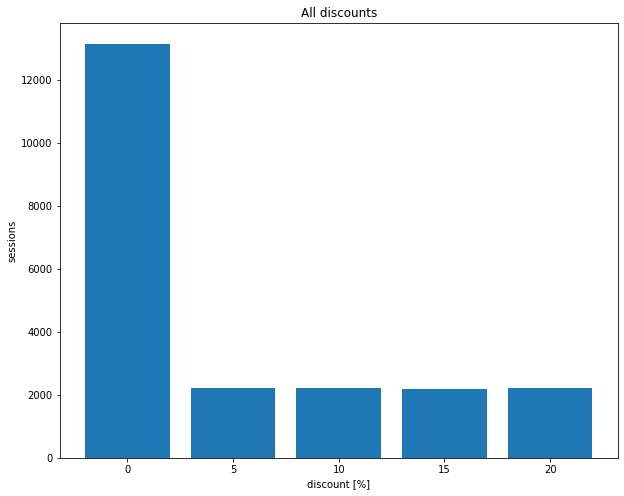

In [5]:
figure(figsize=(10, 8))

x_pos = np.arange(len(sessions_by_discount["all"]))

plt.bar(x_pos, sessions_by_discount["all"])

plt.title("All discounts")
plt.xlabel("discount [%]")
plt.ylabel("sessions")

plt.xticks(x_pos, sessions_by_discount["discount"])

plt.show()

In [6]:
purchases_by_discount = data[["discount", "successful"]].groupby("discount").sum().reset_index("discount")
purchases_by_discount

,discount,successful
0,0,1328
1,5,932
2,10,1075
3,15,1238
4,20,1243


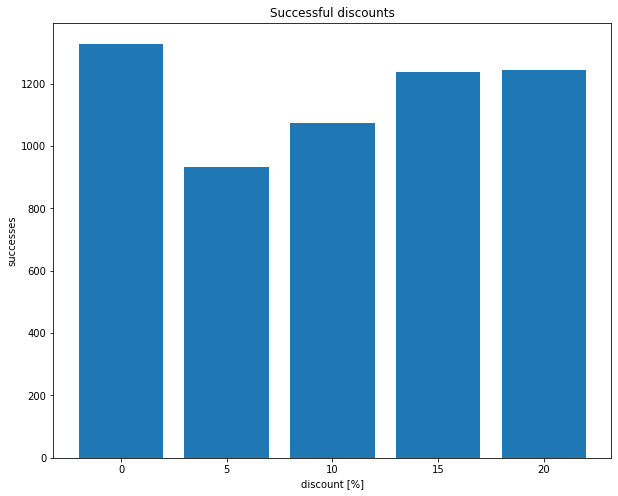

In [7]:
figure(figsize=(10, 8))

x_pos = np.arange(len(purchases_by_discount["successful"]))

plt.bar(x_pos, purchases_by_discount["successful"])

plt.title("Successful discounts")
plt.xlabel("discount [%]")
plt.ylabel("successes")

plt.xticks(x_pos, purchases_by_discount["discount"])

plt.show()

In [8]:
purchase_ratio_per_discount = purchases_by_discount
purchase_ratio_per_discount["all"] = sessions_by_discount["all"]
purchase_ratio_per_discount["ratio"] = purchase_ratio_per_discount["successful"] / purchase_ratio_per_discount["all"]
purchase_ratio_per_discount

,discount,successful,all,ratio
0,0,1328,13150,0.100989
1,5,932,2227,0.418500
2,10,1075,2214,0.485547
3,15,1238,2198,0.563239
4,20,1243,2202,0.564487


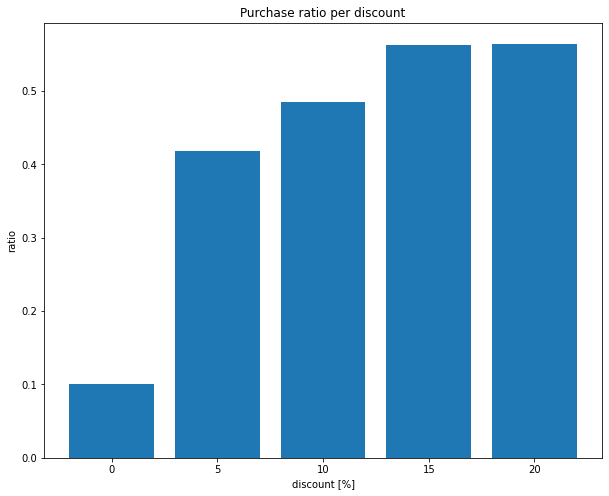

In [9]:
figure(figsize=(10, 8))

x_pos = np.arange(len(purchase_ratio_per_discount["ratio"]))

plt.bar(x_pos, purchase_ratio_per_discount['ratio'])

plt.title('Purchase ratio per discount')
plt.xlabel('discount [%]')
plt.ylabel('ratio')

plt.xticks(x_pos, purchase_ratio_per_discount['discount'])

plt.show()

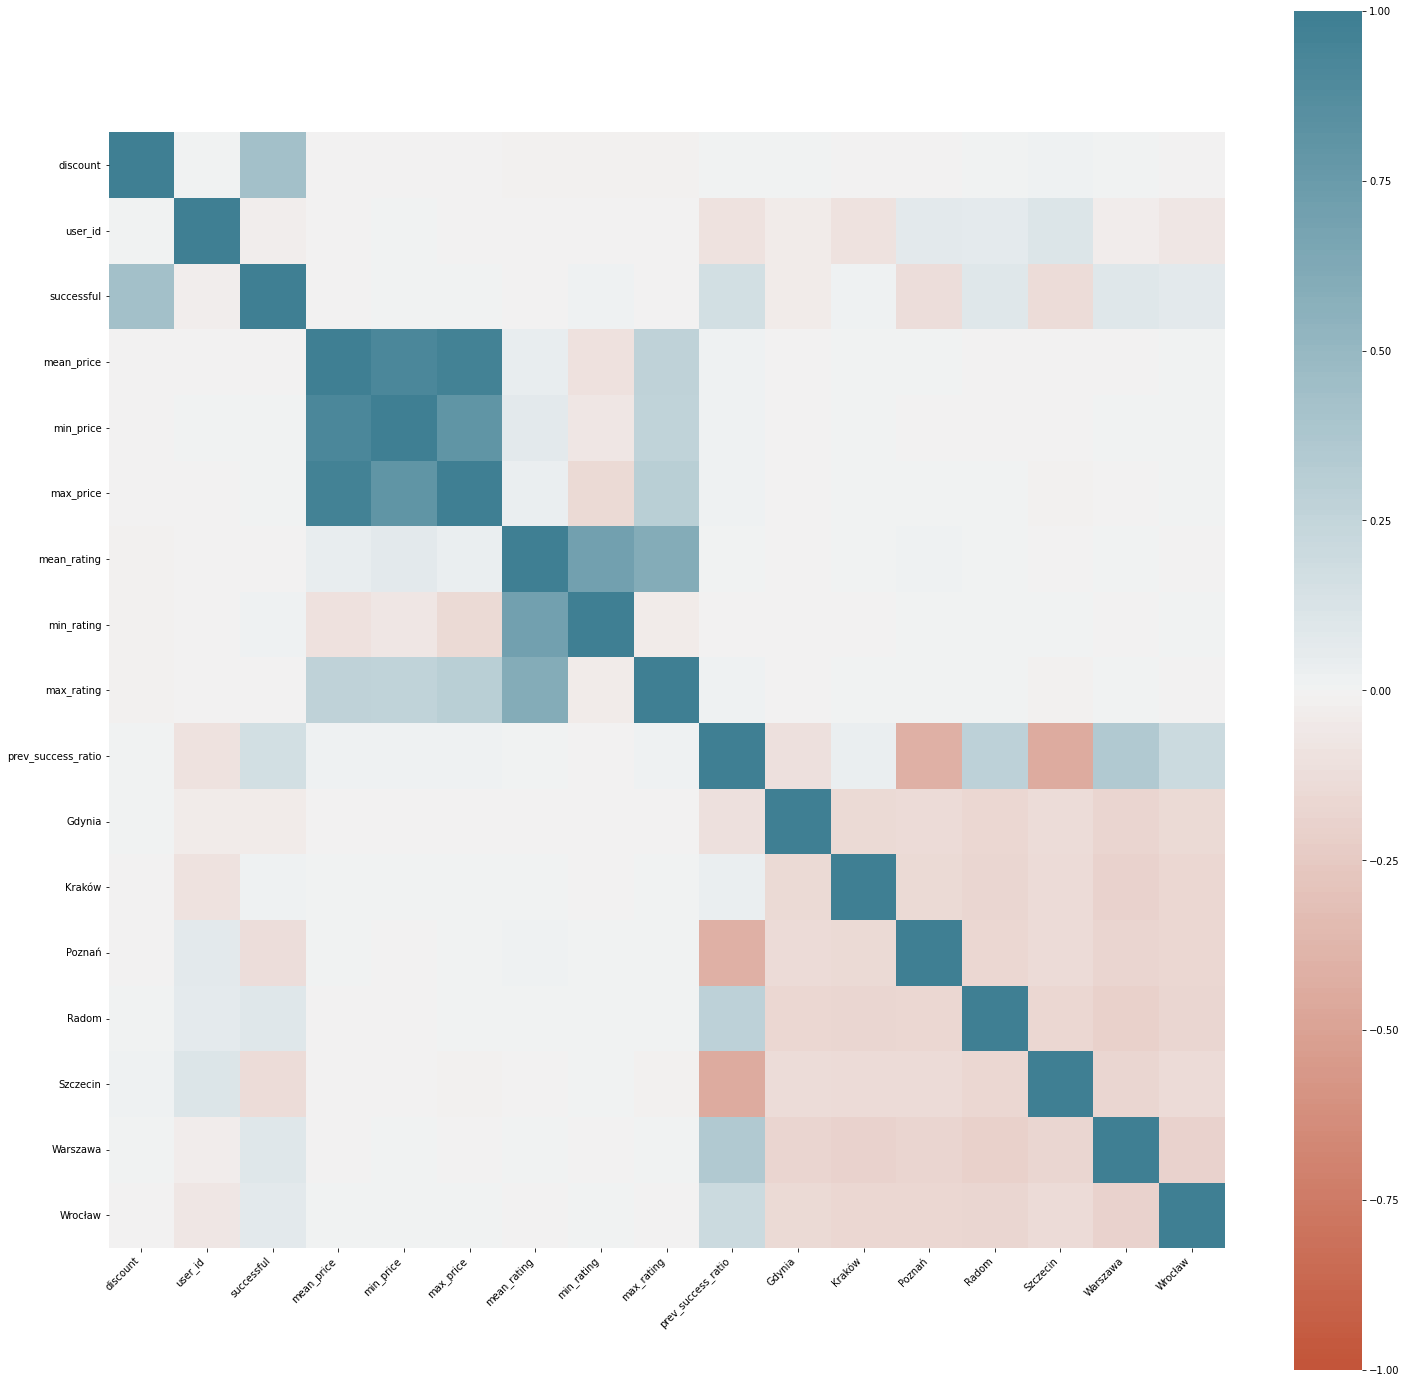

In [10]:
import seaborn as sns

figure(figsize=(25, 25))

corr = data.iloc[:, 1:].corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);